<a href="https://colab.research.google.com/github/Yassaadel/Depi.gov/blob/master/Cats_%26_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels ) = fashion_mnist.load_data()

In [3]:
trn_images, valid_images, trn_labels, valid_labels = train_test_split(train_images, train_labels,test_size=0.2)
trn_images = trn_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

In [4]:
!unzip /content/dogs-cats-images.zip

Archive:  /content/dogs-cats-images.zip
replace dataset/test_set/cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
!ls -l

total 1003856
drwxr-xr-x 2 root root    757760 Aug 16 22:58  cat_dog
-rw-r--r-- 1 root root    377793 Dec 12  2023  cat_dog.csv
-rw-r--r-- 1 root root 571060749 Dec 12  2023  cat-dog-images-for-classification.zip
drwxr-xr-x 4 root root      4096 Aug 16 23:59  dataset
-rw-r--r-- 1 root root 455718914 Sep 29  2019  dogs-cats-images.zip
drwxr-xr-x 3 root root      4096 Aug 16 23:59 'dog vs cat'
drwx------ 5 root root      4096 Aug 17 01:03  drive
drwxr-xr-x 1 root root      4096 Aug 14 13:23  sample_data


In [7]:


# Image dimensions (adjust if needed)
img_width, img_height = 128, 128

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for test/validation data

# Load data using flow_from_directory (replace 'dataset' with your actual folder name)
actual_folder_name = "dataset"
train_generator = train_datagen.flow_from_directory(
    '/content/' + actual_folder_name,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/' + actual_folder_name,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 626s 2s/step - accuracy: 0.8035 - loss: 0.5187 - val_accuracy: 0.8000 - val_loss: 0.5110
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.6250 - loss: 0.8199 - val_accuracy: 0.8125 - val_loss: 0.4900
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


312/312 ━━━━━━━━━━━━━━━━━━━━ 668s 2s/step - accuracy: 0.7991 - loss: 0.5085 - val_accuracy: 0.8000 - val_loss: 0.5003
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8438 - loss: 0.4535 - val_accuracy: 0.8125 - val_loss: 0.4952
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.8008 - loss: 0.5035 - val_accuracy: 0.8000 - val_loss: 0.5016


In [8]:
test_loss, test_accuracy = model.evaluate(validation_generator,
                                           steps=validation_generator.samples // validation_generator.batch_size)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

312/312 ━━━━━━━━━━━━━━━━━━━━ 133s 428ms/step - accuracy: 0.8067 - loss: 0.4927
Test Loss: 0.5039384961128235
Test Accuracy: 0.7999799847602844


313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 446ms/step
Confusion Matrix:
 [[   0 2000]
 [   0 8000]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.80      1.00      0.89      8000

    accuracy                           0.80     10000
   macro avg       0.40      0.50      0.44     10000
weighted avg       0.64      0.80      0.71     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


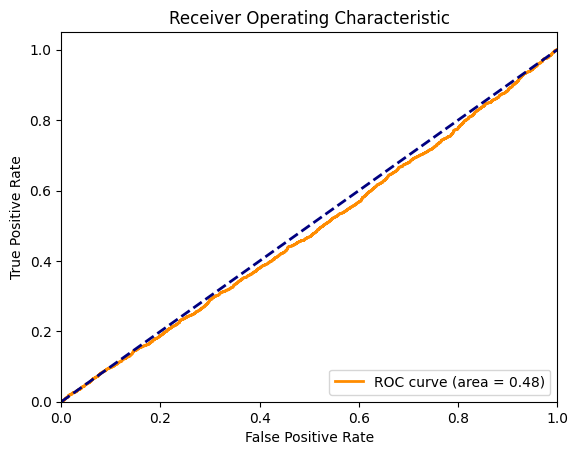

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict probabilities for the entire validation set
y_pred_probs = model.predict(validation_generator)

# Convert probabilities to binary predictions (adjust threshold if needed)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Get true labels from the validation generator
y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# ROC Curve (for binary classification)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)  # Use probabilities for ROC
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()